# Keras Tutorial

## Single perceptrons
The simplest neural network consists of a single neuron. Much like biological neurons, which have dendrites and axons, the single artificial neuron is a simple tree structure which has input nodes and a single output node, which is connected to more input nodes.

There are six components to artificial neurons.

   * Input nodes: Echo input node is associated with a numerical value, which can be any real number. Remember that real numbers make up the full spectrum of numners - positive, negative, whole or decimal.
   * Connections: Each connection that departs from the input node has a weight associated with it and this can also be any real number.
   * Next, all the values of the input nodes and weights of the connections are brought together: they are use as inputs for a weighted sum: y = f(w1*x1 + w2*x2 + w3*x3 + ... + wd*xd) i.e. the sum of all the values mulptiplied by their weigthts.
   * The result will be the input for a transfer or activation function In the simplest but trivial case, this transfer function would be an identity function, f(x) = x (i.e. input and output are the same - no transformation.). However, like a real neuron we can 'trigger' when the sum value reaches a certain level. e.g. f(x) = 0 if x <0, f(x) = 0.5 if x = 0 and f(x) = 1 if x > 0. We can model this on a sigmoid function with appropriate co-efficients.
   
   f(x) = 1/(1+e^-x)
   
   * As a result you have the output node, which is associated with the function (such as the sigmoid function) of the weighted.
   * Lastly, the perceptron ay be an additional parameter, called a bias, which you can actually consider as the weight associated with an additional input node that is permanently set to 1. The bias value is important because it allows you to shift the activation function to the left or right, which can determine the success of your learning.
   
Note that perceptrons only work with numerical data - so you will have to change categorical values into numerical format - e.g. by selection a values occurence, or probability.

Now that you know perceptrons work with thresholds, using them for classification purposes isn't that far off: the perceptrons can agree that any output above a certain threshold might result in the input being a member of the other class. The straight line where the output equals the threshold is then the boundary between the two classes.

## Multi-Layer Perceptrons
Networks of perceptrons are multi-layer perceptrons, and this is the focus of this tutorial. We'll use keras to build these. Multi-layer perceptrons are also known as *feed-forward neural networks*. These are perceptrons organised into multiple layers - often limited to two or three, but theoretically, there is no limit.

The layers act like the biological neurons - the ouputs of one layer server as the inputs for the next layer.

Among the layers, you can distinguish an input layer, hidden layers and an output layer. Multi-layer perceptrons are often fully connected. i.e the output of a top layer, connects to the inputs of every perceptron on the layer below. This connectivity isn't a requirement, but it is typicaly the case that they are fully connected.

Note that while the perceptron could only represent linear separations between classes, the multi-layer perceptron overcoms that limitation and can also represent more complex decision boundaries.

In [6]:
# Load dataset for tutorial
from urllib.request import urlretrieve

red_file = 'winequality-red.csv'
white_file = 'winequality-white.csv'

red_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/' +  red_file 
urlretrieve(red_url, red_file)

white_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/' +  white_file 
urlretrieve(white_url, white_file)

('winequality-white.csv', <http.client.HTTPMessage at 0x10afbf278>)

In [2]:
# Import pandas 
import pandas as pd

red_file = 'winequality-red.csv'
white_file = 'winequality-white.csv'

# Read in white wine data 
white = pd.read_csv(white_file, sep=';')

# Read in red wine data 
red = pd.read_csv(red_file, sep=';')

print(red.shape)
print(white.shape)

(1599, 12)
(4898, 12)


In [3]:
print(red.info())
print(white.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null fl

In [8]:
# First rows of `red`
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
# Last rows of `white`
white.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


In [10]:
# Take a sample of 5 rows of `red`
red.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
181,8.9,0.610,0.49,2.0,0.270,23.0,110.0,0.99720,3.12,1.02,9.3,5
809,7.6,0.480,0.31,2.8,0.070,4.0,15.0,0.99693,3.22,0.55,10.3,6
1531,6.1,0.705,0.10,2.8,0.081,13.0,28.0,0.99631,3.60,0.66,10.2,5
982,7.3,0.520,0.32,2.1,0.070,51.0,70.0,0.99418,3.34,0.82,12.9,6
987,7.1,0.360,0.30,1.6,0.080,35.0,70.0,0.99693,3.44,0.50,9.4,5


In [12]:
# Describe `white`
white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [11]:
# Double check for null values in `red`
# Take advantage of False coercing to zero in a sum
pd.isnull(red).sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

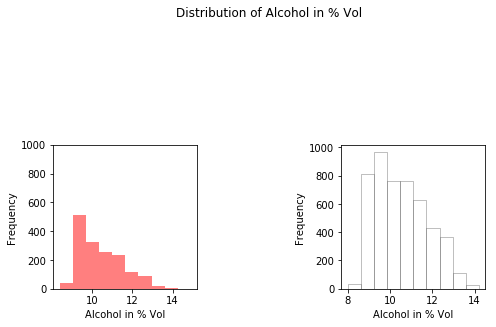

In [15]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2)

ax[0].hist(red.alcohol, 10, facecolor='red', alpha=0.5, label="Red wine")
ax[1].hist(white.alcohol, 10, facecolor='white', ec="black", lw=0.5, alpha=0.5, label="White wine")

fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05, wspace=1)
ax[0].set_ylim([0, 1000])
ax[0].set_xlabel("Alcohol in % Vol")
ax[0].set_ylabel("Frequency")
ax[1].set_xlabel("Alcohol in % Vol")
ax[1].set_ylabel("Frequency")
#ax[0].legend(loc='best')
#ax[1].legend(loc='best')
fig.suptitle("Distribution of Alcohol in % Vol")

plt.show()

In [16]:
# Get the numerical values using an arrage of declared bins
import numpy as np
print(np.histogram(red.alcohol, bins=[7,8,9,10,11,12,13,14,15]))
print(np.histogram(white.alcohol, bins=[7,8,9,10,11,12,13,14,15]))

(array([  0,   7, 673, 452, 305, 133,  21,   8]), array([ 7,  8,  9, 10, 11, 12, 13, 14, 15]))
(array([   0,  317, 1606, 1256,  906,  675,  131,    7]), array([ 7,  8,  9, 10, 11, 12, 13, 14, 15]))


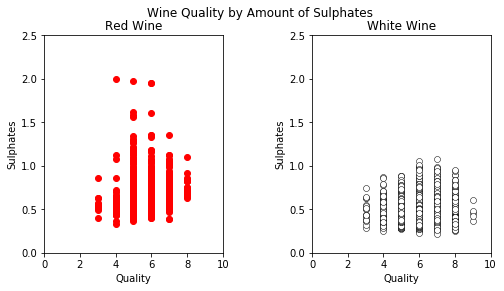

In [17]:
# Explore the sulphates data
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(8, 4))

ax[0].scatter(red['quality'], red["sulphates"], color="red")
ax[1].scatter(white['quality'], white['sulphates'], color="white", edgecolors="black", lw=0.5)

ax[0].set_title("Red Wine")
ax[1].set_title("White Wine")
ax[0].set_xlabel("Quality")
ax[1].set_xlabel("Quality")
ax[0].set_ylabel("Sulphates")
ax[1].set_ylabel("Sulphates")
ax[0].set_xlim([0,10])
ax[1].set_xlim([0,10])
ax[0].set_ylim([0,2.5])
ax[1].set_ylim([0,2.5])
fig.subplots_adjust(wspace=0.5)
fig.suptitle("Wine Quality by Amount of Sulphates")

plt.show()

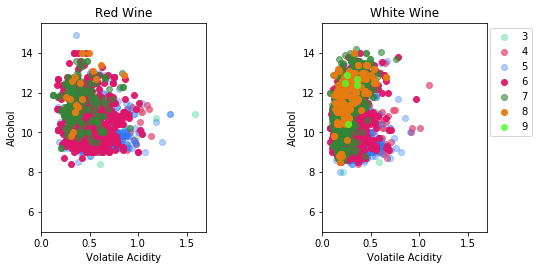

In [23]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(570)

redlabels = np.unique(red['quality'])
whitelabels = np.unique(white['quality'])

fig, ax = plt.subplots(1, 2, figsize=(8, 4))
redcolors = np.random.rand(6,4)
whitecolors = np.append(redcolors, np.random.rand(1,4), axis=0)

for i in range(len(redcolors)):
    redy = red['alcohol'][red.quality == redlabels[i]]
    redx = red['volatile acidity'][red.quality == redlabels[i]]
    ax[0].scatter(redx, redy, c=redcolors[i])
for i in range(len(whitecolors)):
    whitey = white['alcohol'][white.quality == whitelabels[i]]
    whitex = white['volatile acidity'][white.quality == whitelabels[i]]
    ax[1].scatter(whitex, whitey, c=whitecolors[i])
    
ax[0].set_title("Red Wine")
ax[1].set_title("White Wine")
ax[0].set_xlim([0,1.7])
ax[1].set_xlim([0,1.7])
ax[0].set_ylim([5,15.5])
ax[1].set_ylim([5,15.5])
ax[0].set_xlabel("Volatile Acidity")
ax[0].set_ylabel("Alcohol")
ax[1].set_xlabel("Volatile Acidity")
ax[1].set_ylabel("Alcohol") 
#ax[0].legend(redlabels, loc='best', bbox_to_anchor=(1.3, 1))
ax[1].legend(whitelabels, loc='best', bbox_to_anchor=(1.3, 1))
#fig.suptitle("Alcohol - Volatile Acidity")
fig.subplots_adjust(top=0.85, wspace=0.7)

plt.show()

## EDA Summary
   * Some of the variables have values that are considerably far apart. We deal with this in the next section of the tutorial.
   * You have an ideal scenario - there are no null values in the data sets.
   * Mosts wines in this data set have a wide median of 9% alcohol.
   * Red wine seems to contain more sulphates than the white wine, which has less sulphates above 1g/dm^3.
   * Most wines in this dataset have a volatility of 0.5 and below. At the moment there is no direct relation to the quality of the wine.
   
Now - let's set ourselves a challenge: So classify the data into white or red wine.

In [24]:
# Let's build a single data set, with type distinguishing between red and white wine

# Add `type` column to `red` with value 1
red['type'] = 1

# Add `type` column to `white` with value 0
white['type'] = 0

# Append `white` to `red`
# We ignore the white index, and instead extend the red index
wines = red.append(white, ignore_index=True)

In [25]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
type                    6497 non-null int64
dtypes: float64(11), int64(2)
memory usage: 659.9 KB


In [26]:
wines.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.246114
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


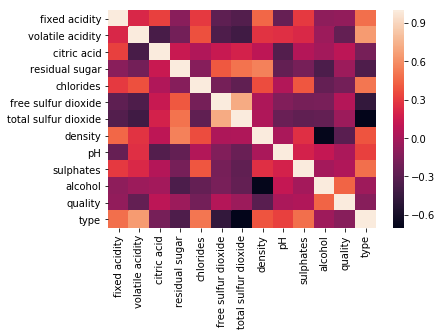

In [28]:
# import seaborn - a wrapper around matplotlib
import seaborn as sns

# Create a correlation matrix of all values
corr = wines.corr()

# Create a heatmap
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

#sns.plt.show()

In [29]:
corr.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743,0.486740
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699,0.653036
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532,-0.187397
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980,-0.348821
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666,0.512678


Our data is not balanced - we have more white wine samples than red. We'll leave this as is - but if our models do not perform, we can consider under or oversampling to compensate.

Let's separate our data into training, and test data with functions from sklearn.model_selection

In [80]:
# Import `train_test_split` from `sklearn.model_selection`
from sklearn.model_selection import train_test_split

# Specify the data 
X=wines.iloc[:,0:11]

# Specify the target labels and flatten the array 
#y=np.ravel(wines.type)

# That is a nifty function -I prefer tolist() for clarity
y=wines['type'].tolist()

# Split the data up in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [81]:
# we still produce dataframes here
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1700,7.1,0.12,0.32,9.6,0.054,64.0,162.0,0.99620,3.40,0.41,9.4
5199,6.8,0.12,0.30,12.9,0.049,32.0,88.0,0.99654,3.20,0.35,9.9
3340,7.7,0.38,0.40,2.0,0.038,28.0,152.0,0.99060,3.18,0.32,12.9
86,8.6,0.49,0.28,1.9,0.110,20.0,136.0,0.99720,2.93,1.95,9.9
5587,6.1,0.20,0.17,1.6,0.048,46.0,129.0,0.99100,3.30,0.43,11.4


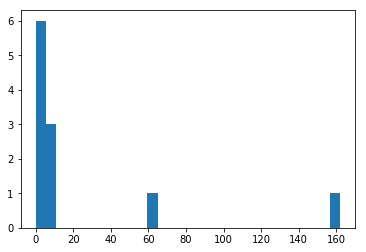

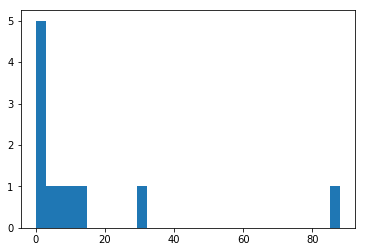

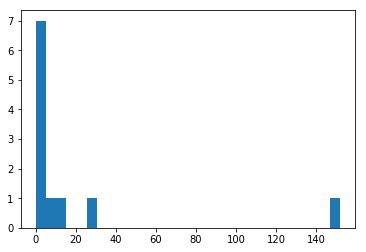

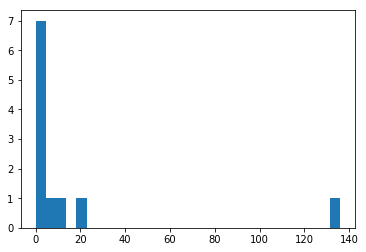

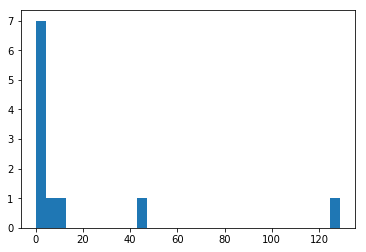

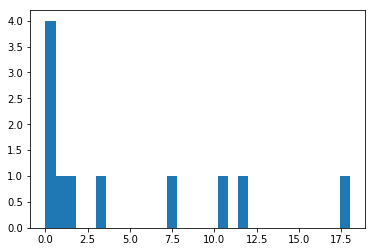

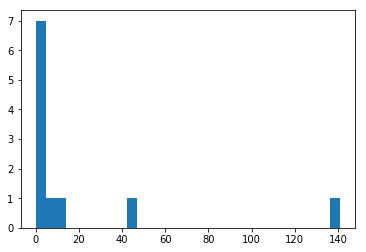

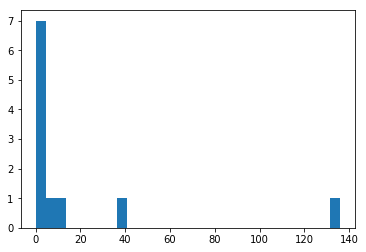

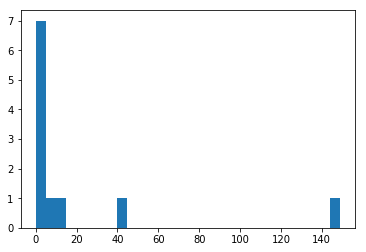

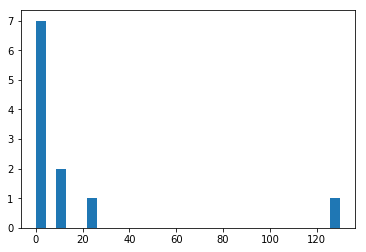

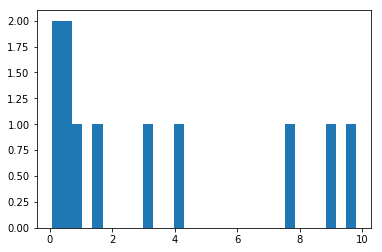

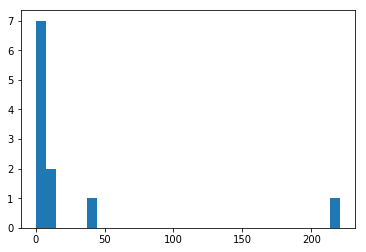

In [82]:
# Show histograms for all the columns.
# we re-scale these later on - I want to see how they change.
for i in list(range(12)):
    plt.hist(X_train.iloc[i,:], bins=30)
    plt.show()

In [32]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [34]:
y[0:20]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [35]:
y.dtype

dtype('int64')

In [83]:
# Let's scale our data to the range -1 to +1

# Import `StandardScaler` from `sklearn.preprocessing`
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(X_train)

# Scale the train set
X_train = scaler.transform(X_train)

# Scale the test set
X_test = scaler.transform(X_test)

In [84]:
# Hmm - let's print a before and after histogram
print(X_train[0,:].max())
print(X_train[0,:].min())

print(X_test[0,:].max())
print(X_test[0,:].min())

print(X.iloc[0,:].max())
print(X.iloc[0,:].min())

1.92023422559
-1.33696831653
2.90709263639
-1.02763891124
34.0
0.0


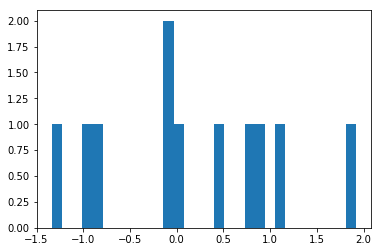

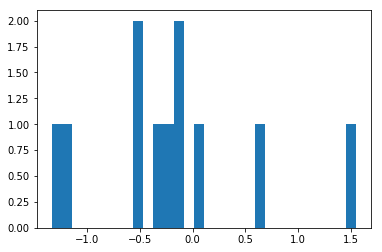

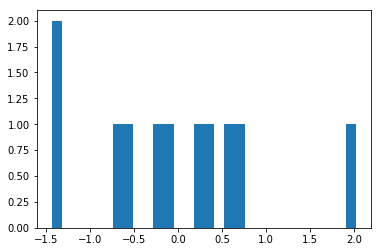

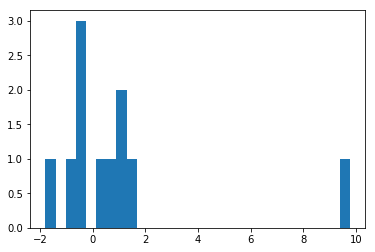

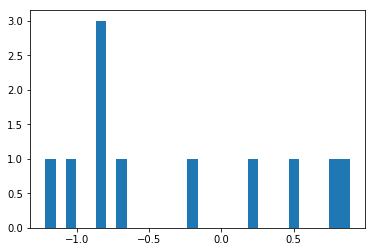

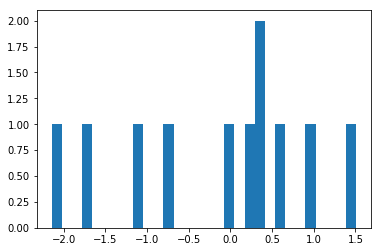

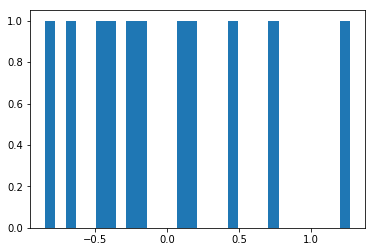

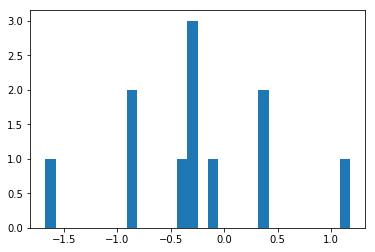

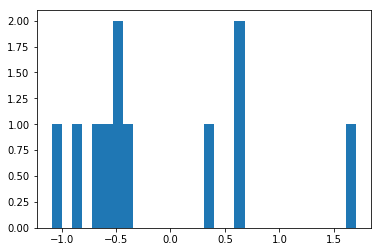

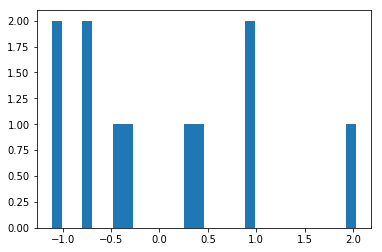

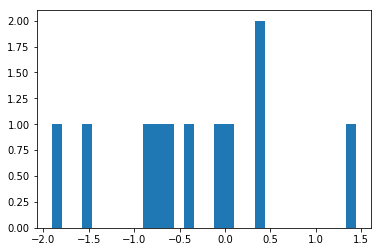

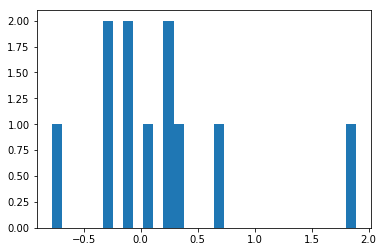

In [85]:
for i in list(range(12)):
    plt.hist(X_train[i,:], bins=30)
    plt.show()

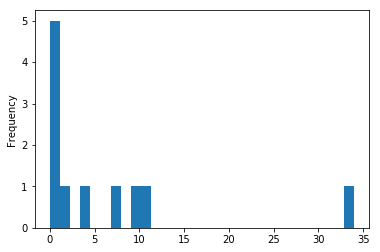

In [74]:
X.iloc[0,:].plot(kind='hist', bins=30)
plt.show()

In [90]:
for i in list(range(11)):
    print(i, "\t", X_train[:,i].max())

0 	 6.55799810557
1 	 7.69545031801
2 	 4.70618990279
3 	 12.5789484263
4 	 16.5920652129
5 	 6.64571732759
6 	 4.09554939764
7 	 14.6755674336
8 	 4.95947731651
9 	 9.77157958471
10 	 2.98804121397


Hmm - doesn't make sense. Need to read up on scalers. I was expecting it to move the data to -1 to +1 - and certainly NOT to change the histograms - but graphing before and after, each column looks quite different...

## Model with Keras
We want to classify, and a multi-layer perceptron network performs well on this class of problem. This type of network is often fully connected. That means you are looking to build a fairly simple stack of fully connected layers to solve this problem. As for the activation function, its best to use one of the most common ones here, which is the relu activation function (TODO: what's that then?)

How do you start building this? A quick way to get started is to use the Keras Sequential model: it's a linear stack of layers. You can easily create the model by passing a list of layer instances to the constructor, which you set up by running model = Sequential().

Now its best to think about the structure of the multi-layer perceptron - you have an input layer, some hidden layers, and an output layer. The model needs to know what input shape to expect and that's why you'll always find the input_shape, input_dim, input_length or batch_size arguments in the documentation of the layers and in the practical examples of those layers.

In this case, you will have to use a Dense layer, which is a fully connected layer. Dense layers implement the following operation: 

   `output = activiation(dot(input, kernel) + bias)`
   
Note that without the activation function, your Dense layer would consist only of two linear operations: a dot product and an addition. Remember a dot product multiplies two arrays one element at a time, as we make one a tranpose. Multiplying matrices of the same dimension creates a cross product. i.e. you multiply all the terms together - that's not what we want.

In the first layer the activation argument takes the value relu. Next you also see that the input_shape has been defined. This is  the input of the operation that you have just seen: the model takes as input, arrays of shape (12,) or (*,12). Lastly, you see that the first layer has 12 as a first value for the units argument of Dense(), which is the dimensionality of the output space and which are actually 12 hidden units. This means that the model will output arrays of shape (*, 12): this is the dimensionality of the output space. This will get clearer as we explore the tutorial.

The units actually represents the kernel of the above formula or the weights matrix, composed of all the weights given to all input nodes, created by the layer. Note that you don't include any bias in the example below, as you haven't included the use_bias argument and set it to True, which is also a possibility.

The intermediate layer also uses the relu (Rectified Linear Unit) activation function. The output of this layer will be always of shape (*, 8) (TODO: Why?)

*side analysis from python machine learning*
There are lots of decision functions - but the classic logistic and tanh have a problem with the gradient descent approaches during model building. For very large values, there is virtually  no change in gradient, so it takes exponentially more iterations to find a local maxima/minima. ReLu solves this by being zero until x=0, then it follows a linear line to infinity.

You are ending the network with a Dense layer of size 1. The final layer will also use a sigmoid activation function so that your output is actually a probability; This means that this will result in a score between 0 and 1, indicating how likely the sample is to have the target “1”, or how likely the wine is to be red.

In [115]:
# Import `Sequential` from `keras.models`
from keras.models import Sequential

# Import `Dense` from `keras.layers`
from keras.layers import Dense

# Initialize the constructor
model = Sequential()

# Add an input layer 
model.add(Dense(64, activation='relu', input_dim=12))

# Add one hidden layer 
model.add(Dense(64, activation='relu'))

# Add an output layer 
model.add(Dense(1, activation='sigmoid'))

You see there are two key architecture decisions to build the model: How many layers we are going to use, and how many 'hidden units' you will choose for each layer.

In this case, you picked 12 hidden unies for the first layer of your model: as you read above, this is the dimensionality of the output space. In other words, you're setting the amount of freedom that you are allowing the network to have when its' learning representations. If you would allow more hidden units, your network will be able to learn more complex representations but it will also take longer to build, and might suffer from overfitting.

Overfitting occurs when the model is too complex: It will wrap the training data too closely, and lose the ability to pick out the underlying patterns which will occur in test and future real data.

When you don't have much data, you should prefer small networks with very few hidden layers (typicaly one, like the example above).

If you want to get some information on the model that you have just created, you can use the attributed output_shape or the summary() function, among others. Some of the most basic ones are listed below.

In [95]:
# Model output shape
model.output_shape

# Model summary
model.summary()

# Model config
model.get_config()

# List all weight tensors 
model.get_weights()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                144       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 257
Trainable params: 257
Non-trainable params: 0
_________________________________________________________________


[array([[ 0.2896654 ,  0.01695609, -0.1637314 , -0.4055706 , -0.1897687 ,
          0.05104744, -0.47552979,  0.04375035,  0.14994401,  0.18585712,
          0.04605234,  0.4203161 ],
        [ 0.09246093, -0.00486219,  0.15394145, -0.3556453 ,  0.37075537,
         -0.09201503,  0.22433394,  0.49172276,  0.02939814, -0.00528288,
         -0.28554958, -0.29101855],
        [ 0.13772285,  0.10540932, -0.16185051, -0.13713309, -0.30931568,
          0.29137081,  0.22610158, -0.03789827,  0.03900152, -0.13670495,
          0.02206749,  0.07224816],
        [ 0.12972063, -0.46136355, -0.1358273 , -0.03706533,  0.21573442,
          0.21198452, -0.02762926, -0.19320443,  0.24703926, -0.42241281,
          0.29690397, -0.07473344],
        [-0.06937274,  0.13956004, -0.04767117,  0.03820831,  0.27192348,
         -0.47782913, -0.09866273, -0.42932004, -0.04532751, -0.17295876,
         -0.34326571,  0.48160571],
        [ 0.06270897,  0.10312521,  0.34606183, -0.12457022, -0.16116223,
      

In [96]:
# Whoop whoop - now lets model!
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
                   
model.fit(X_train, y_train,epochs=20, batch_size=1, verbose=1)

Epoch 1/20
4352/4352 [==============================] - 19s 4ms/step - loss: 0.0901 - acc: 0.9692
Epoch 2/20
4352/4352 [==============================] - 19s 4ms/step - loss: 0.0221 - acc: 0.9959
Epoch 3/20
4352/4352 [==============================] - 18s 4ms/step - loss: 0.0195 - acc: 0.9966
Epoch 4/20
4352/4352 [==============================] - 18s 4ms/step - loss: 0.0166 - acc: 0.9970
Epoch 5/20
4352/4352 [==============================] - 19s 4ms/step - loss: 0.0152 - acc: 0.9975
Epoch 6/20
4352/4352 [==============================] - 18s 4ms/step - loss: 0.0140 - acc: 0.9972
Epoch 7/20
4352/4352 [==============================] - 18s 4ms/step - loss: 0.0133 - acc: 0.9972
Epoch 8/20
4352/4352 [==============================] - 18s 4ms/step - loss: 0.0145 - acc: 0.9972
Epoch 9/20
4352/4352 [==============================] - 18s 4ms/step - loss: 0.0124 - acc: 0.9975
Epoch 10/20
4352/4352 [==============================] - 18s 4ms/step - loss: 0.0109 - acc: 0.9975
Epoch 11/20
4352/43

In compiling you configure the model with the adam optimizer and the binary_crossentropy loss function. Additionally, you can also monitor the accuracy during the training by passing `['accuracy']` to the metrics argument.

The optimizer and the loss are two arguments that are required if you want to compile the model. Some of the most popular optimisation algorithms user are the Stochastic Gradient Descent (SGD), ADAM and RMSprop. Depending on whichever algorithm you use, you'll need to tune certain parameters, such as learning rate or momentum. The choice for a loss function depends on the task that you have at hand: for example, for a regression problem, you'll use the Mean Squared Error (MSE). As you see in this example, you used binary_crossentropy for the binary classification problem of determining whether a wine is red or white. Lastly, with multi-class classification, you'll make use of categorical_crossentropy.

After, you can train the model for 20 epochs, or iterations, over all the samples in X_train and y_train, in batches of 1 sample. You can also specify the verbose argument. By setting it to 1, you indicate you want to see progress bar logging.

In other words, you have to train the model for a specified number of epochs or exposures to the training set. An epoch is a single pass through the entire training set, folloe

In [97]:
y_pred = model.predict(X_test)

In [103]:
y_pred[:5].round()
y_pred_binary = y_pred.round()

In [99]:
y_test[:5]

[0, 1, 0, 0, 0]

In [104]:
score = model.evaluate(X_test, y_test,verbose=1)

print(score)

2145/2145 [==============================] - 0s 57us/step
[0.028133857241784365, 0.9944055944055944]


In [ ]:
# Import the modules from `sklearn.metrics`
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score

# Confusion matrix
confusion_matrix(y_test, y_pred_binary)


In [108]:
# Precision 
precision_score(y_test, y_pred_binary)

0.99455535390199634

In [110]:
# Recall
recall_score(y_test, y_pred_binary)

0.98384201077199285

In [112]:
# F1 score
f1_score(y_test,y_pred_binary)

0.98916967509025266

In [113]:
# Cohen's kappa
cohen_kappa_score(y_test, y_pred_binary)

0.98539861110953542

# Exercises
Try and classify the quality of a wine, using the categorical_crossentropy as the loss function. We'll re-use our scaled data, but instead set quality as our y value.

Check out the separate sheet.